## No1　Q1
二つのデータ点の近さを測る定量的指標の一つとして距離がある。\\
いま、次の三つのデータ点があるとする：\\
　　* データ点１$(5, 2, 5, 8)$
　　* データ点２$(7, 10, 1, 12)$
　　* データ点３$(3, 2, 6, 3)$
上の各データ点は４種類の計測値で与えられている（例えば「緯度、経度、水深、温度」のような感じ）。\\
このデータ点同士の間の近さをユークリッド距離で計算し、互いの距離が近いペアの順番を答えよ。\\
データが近いほど距離が小さいことに注意。

In [3]:
import math
import numpy as np

def get_euclidean_distance(x1: np.ndarray, x2: np.ndarray) -> float:
    return math.sqrt(np.sum((x1 - x2) ** 2))

#それぞれのデータ点の距離を計算し、リストに格納する
result: list[list[str, float]] = []
x1 = np.array([5,2,5,8])
x2 = np.array([7,10,1,12])
x3 = np.array([3,2,6,3])

result.append(["点1と点2", get_euclidean_distance(x1, x2)])
result.append(["点1と点3", get_euclidean_distance(x1, x3)])
result.append(["点2と点3", get_euclidean_distance(x2, x3)])

#距離を昇順にソートする
result.sort(key=lambda x: x[1])
for i,r in enumerate(result):
    print(f"{i+1}.{r[0]} 距離：{r[1]}")




1.点1と点3 距離：5.477225575051661
2.点1と点2 距離：10.0
3.点2と点3 距離：13.638181696985855


## No2　Q2

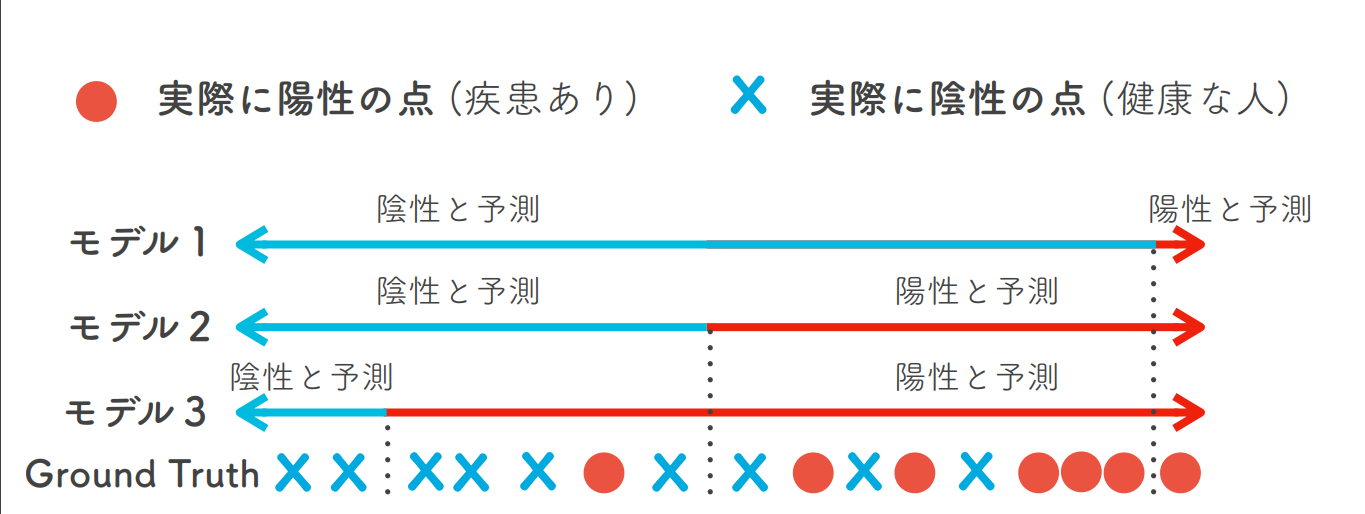

* 1.上の三つの分類モデルそれぞれに対し、混同行列、Precision、Recallを計算しなさい。

* 2.モデル1→モデル2→モデル3の順に、Precisionは増加や減少の傾向にあるでしょうか？その傾向はなぜ生じるでしょう？
また、Recallについても傾向はどうなっていますか？Precisionの傾向と対比して議論して見てください。

In [1]:
# No2 Q2

def get_confusion_matrix(pred_data:list[bool], truth_data:list[bool]) -> list[list[int]]:
    """混同行列を返す
    Args:
        pred_data (list): 予測データ
        truth_data (list): 正解データ
    Returns:
        list[int]: 混同行列
        [
            [TP, FP],
            [FN, TN]
        ]
    """
    matrix: list[list[int]]
    TP: int = 0
    FP: int = 0
    FN: int = 0
    TN: int = 0

    for pred, truth in zip(pred_data, truth_data):
        if pred and truth:
            TP += 1
        elif pred == True and truth == False:
            FP += 1
        elif pred == False and truth == True:
            FN += 1
        elif truth == False and truth == False:
            TN += 1
    matrix = [
        [TP, FP],
        [FN, TN]
    ]

    return matrix


def calc_precision(TP:int, FP:int) -> float:
    """適合率を計算する"""
    return TP / (TP + FP)

def calc_recall(TP:int, FN:int) -> float:
    """再現率を計算する"""
    return TP / (TP + FN)


truth_data  = [False, False, False, False, False,  True, False, False,  True, False,  True, False,  True,  True,  True,  True]
modelA_pred = [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False,  True]
modelB_pred = [False, False, False, False, False, False, False,  True,  True,  True,  True,  True,  True,  True,  True,  True]
modelC_pred = [False, False,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True]

modelA_conf_matrix = get_confusion_matrix(modelA_pred, truth_data)
modelB_conf_matrix = get_confusion_matrix(modelB_pred, truth_data)
modelC_conf_matrix = get_confusion_matrix(modelC_pred, truth_data)

print(f'モデル1の混同行列:{modelA_conf_matrix}')
print(f'モデル1のPrecision:')
print(f'モデル1のRecall:')

print(f'モデル2の混同行列:{modelB_conf_matrix}')
print(f'モデル2のPrecision:')
print(f'モデル2のRecall:')

print(f'モデル3の混同行列:{modelC_conf_matrix}')
print(f'モデル3のPrecision:')
print(f'モデル3のRecall:')


モデル1の混同行列:[[1, 0], [6, 9]]
モデル1のPrecision:
モデル1のRecall:
モデル2の混同行列:[[6, 3], [1, 6]]
モデル2のPrecision:
モデル2のRecall:
モデル3の混同行列:[[7, 7], [0, 2]]
モデル3のPrecision:
モデル3のRecall:
